# TP noté HMMA238







La première chose à faire est de charger toutes les fonctions que nous avons créer et que nous allons utiliser dans ce compte rendu de TP.

In [1]:
run utils.py.ipynb


## Exercice 1: Le jeu de la vie


## Partie I : Implémentation sans numpy


### Question 4

Nous commençons par définir comme dans l'énoncénotre matrice de départ, représentant le plateau du jeu au tour 0, appelé Z.

In [2]:
Z = [[0,0,0,0,0,0],
[0,0,0,1,0,0],
[0,1,0,1,0,0],
[0,0,1,1,0,0],
[0,0,0,0,0,0],
[0,0,0,0,0,0]]

N=calcul_nb_voisins(Z)
N

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

La sortie de cette fonction calcule le nombre de voisins vivants de chaque cellule sous forme d'une liste représentant le plateau de jeu.

 Nous allons maintenant décrire et expliciter le fonctionnement et le but de la fonction iteration jeu qui nous a été fournie.

In [3]:
"Nous donnonscomme argument notre matrice du jeu de la vie à un tour n"

def iteration_jeu(Z):
    
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    for x in range(1,forme[0]-1):
        for y in range(1,forme[1]-1):
            "conditions de mort puis de naissance"
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z
"Nous récupérons notre matrice du jeu de la vie au tour n+1"

'Nous récupérons notre matrice du jeu de la vie au tour n+1'

### Question 5

Cette fonction permet de réaliser un tour du jeu de la vie à partir des valeurs du tour précédent (Z) et de la fonction calcul_nb_voisins. Cette fonction modifie directement  notre liste Z avec la mise à jour des cellules : soit la cellule survie, soit la cellule périt.

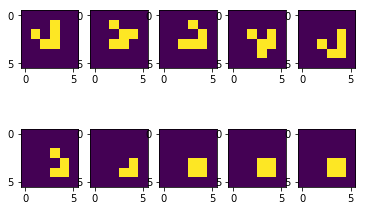

In [4]:
import matplotlib.pyplot as plt
import numpy as np

Z2=list(Z)

plt.subplot(2,5,1)
plt.imshow(np.asarray(Z2))

for i in range(2,11):
    Z=iteration_jeu(Z2)
    plt.subplot(2,5,i)
    plt.imshow(np.asarray(Z2))

### Question 6

Entre l'itération 0 et 4, nous remarquons que plusieurs cellules vivent et meurent à chaque itération, cependant le nombre de cellules vivantes reste inchangé (au nombre de 5) à chaque fin de tour.  
À partir de l'itération 7 et ce jusqu'à l'itération 9, nous remarquons que le jeu est à l'équilibre. En effet, plus aucune cellule ne meurt ou ne naît. Cet équilibre se maintiendra peut importe le nombre de tour que nous réaliseront, le jeu est alors terminé, plus aucune évolution n'étant possible.

## Partie II : Implémentation avec numba

### Question 7

Dans cette question nous cherchons à savoir si le fait d'optimiser notre fonction iteration_jeu_nb avec la fonction jit va nous faire gagner du temps ou non.

Nous commençons par importer les packages nécessaire à cette questions. 

In [25]:
import time
from numba import jit

Nous commençons par définir une nouvelle fonction iteration_jeu_nb_V2 qui est la même que iteration_jeu_nb avec un nom différent afin de pouvoir en conserver une non optimisée. Nous appliquons alors jit à cette nouvelle fonction.

In [26]:
@jit
def iteration_jeu_nb_V2(Z, n):
    affichage = (n // 2) + 1
    Z2 = np.asarray(list(Z))
    plt.subplot(affichage, 2, 1)
    plt.imshow(np.asarray(Z2))
    for i in range(2, n + 2):
        Z = iteration_jeu(Z2)
        plt.subplot(affichage, 2, i)
        plt.imshow(Z2)
    return Z2


Tout d'abord, pour nous rendre compte qu'il existe une différence entre la première utilisation d'une fonction optimisée par jit puis après son optimisation, nous avons écrit le code ci-dessous.

Temps écoulé avec la compilation de jit = 1.2292895317077637
Temps écoulé après la compilation de jit = 0.02498316764831543


C:\Users\julien\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


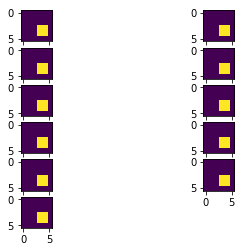

In [7]:
start = time.time()
iteration_jeu_nb_V2(Z, 10)
end = time.time()
print("Temps écoulé avec la compilation de jit = %s" % (end - start))


start = time.time()
iteration_jeu_nb_V2(Z, 10)
end = time.time()
print("Temps écoulé après la compilation de jit = %s" % (end - start))


Ceci est une fonction permettant de calculer la différence de temps de calcul de la fonction iteration_jeu_nb avant optimisation jit, pendanr puis après. Cet algorithme s'inspire d'un exemple d'utilisation réalisé en cours. Il est intéressant car il permet de comparer les différents temps de compilation suivant la version de notre fonction,et d'en faire une moyenne suivant le nombre d'itération voulue.

Améliorations en pourcentage par rapport au code vanilla
[37134.16905444]
[200.40592168]


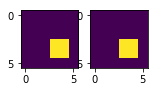

In [8]:
t0 = []
t1 = []
t2 = []
n = 7

for i in range(1, 2):
    @jit
    def iteration_jeu_nb_optijit(Z, n):
        affichage = (n // 5) + 1
        Z2 = np.asarray(list(Z))
        plt.subplot(affichage, 5, 1)
        plt.imshow(np.asarray(Z2))
        for i in range(2, n + 2):
            Z = iteration_jeu(Z2)
            plt.subplot(affichage, 5, i)
            plt.imshow(Z2)
        return Z2

    # Notre code avec le temps de compilation jit inclus.
    start = time.time()
    iteration_jeu_nb_optijit(Z, i)
    end = time.time()
    t0.append(end - start)

    # Notre code optimisé par jit, sans le temps de la compilation.
    start = time.time()
    iteration_jeu_nb_optijit(Z, i)
    end = time.time()
    t1.append(end - start)

    # Notre code original.
    start = time.time()
    iteration_jeu_nb(Z, i)
    end = time.time()
    t2.append(end - start)

t0 = np.array(t0)
t1 = np.array(t1)
t2 = np.array(t2)

print("Améliorations en pourcentage par rapport au code original")

print((t0 - t2) / t2 * 100)
print((t1 - t2) / t2 * 100)


### Question 8



Nous définissons la matrice Z_huge comme présentée dans l'énoncé.

In [9]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
[[0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0],
[0, 1, 0, 1, 0, 0],
[0, 0, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np


Nous avons défini une fonction permettant d'itérer n tours du jeu de la vie vec comme matrice de départ Z_huge et qui nous renvoie la matrice ainsi obtenue.
Nous utilisons cette fonction nouvellement défini afin de réaliser un widget permettant de nous afficher le plateau du jeu de la vie au tour n.

In [28]:
ip.interact(iteration_jeu_Z_huge, n=(1, 350, 1))


interactive(children=(IntSlider(value=175, description='n', max=350, min=1), Output()), _dom_classes=('widget-…

<function __main__.iteration_jeu_Z_huge(n)>

En faisant varier le nombre de tours, nous remarquons que le jeu se retrouve à l'équilibre lorsque nous atteignons le tour 343.

# Exercice II

Cette exercice va porter sur l'étude du jeu de données MNIST qui est un jeu de données d'images sur lesquelles des chiffres sont écrits en version manuscrite. Notre but ici est de se familiariser avec cejeu de données et d'effectuer plusieurs manipulation avec python pour en apprendre plus dessus.

### Question 1

Nous commençons par importer les données nécessaire et définir nos variables.

In [32]:
from sklearn.datasets import fetch_openml


In [33]:
mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float64')
y = mnist.target


### Question 2

Ici, nous voulaons modifier notre jeu de données X de manière à ne garder que des images composées de 3 ou de 7.

In [31]:
#On récupère les images ayant comme numéros le 3 et le 7.
mask3 = (y=='3')
mask7 = (y== '7')
#On stocke dans les variables indices leurs positionnement.
indices3 = np.where(mask3)
indices7 = np.where(mask7)
#On redéfinit un jeu de données ne comportant que des 7 et des 3.
X3=X[indices3]
X7=X[indices7]


Maintenant, nous cherchons à afficher chacun des numéros pour nous donner une idée. Le code permettant d'afficher cela est le code ci-dessous. Notant que notre vecteur d'mage étant de taille 784, nous avons donc utlisé un $reshape$ en le réécrivant sous forme d'une matrice 28$\times$28.

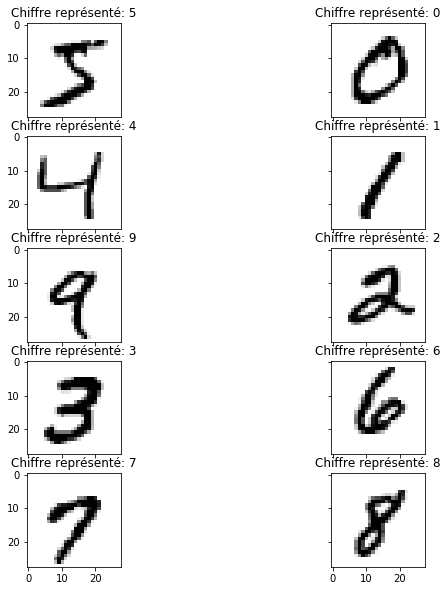

In [34]:
fig, axes = plt.subplots(5, 2,
                         figsize=(10, 10),
                         sharex=True, sharey=True)
test = []
i = 0

while len(test) <= 9:
    if format(y[i]) in test:
            i += 1
    else:
        image = np.reshape(X[i, :], (28, 28))
        subplot_row = len(test) // 2
        subplot_col = len(test) % 2
        ax = axes[subplot_row, subplot_col]
        ax.imshow(image, cmap='gray_r')
        ax.set_title('Chiffre représenté: {}'.format(y[i]))
        test.append(y[i])
        i += 1


### Question 2


Nous voulons effectuer une régression logistique sur l'ensemble de nos données X, nous commençons donc par importer les packages nécessaires à cela, puis nous réalison notre regression et stockons son résultat dans la variable quenous nommons reg.log pour regression logistique. 

In [35]:
from sklearn.linear_model import LogisticRegression


In [36]:
reg.log = LogisticRegression(fit_intercept=False).fit(X, y)


C:\Users\julien\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\julien\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Le vecteur $\omega$ est le vecteur appris par la méthode de régression logistique. Pour l'obtenir, il suffit de récupérer le résultat en faisant la commante reg.log.coef_.

In [18]:
omega=reg.log.coef_

(10, 784)

### Question 4

Nous avons créé une fonction dans le fichier ${utils.py}$ permettant de représenter l'impact de la transformation de notre image par l'opération (1) en fonction de la valeur de $\alpha$. Cette fonction est comentée afin d'expliquer son fonctionnement. Nous choisissons dans cet exemple de prendre une image associée au chiffre 7. Nous allons donc utiliser notre matrice X7 créée lors de la question 2 et ne possédant que les chiffres 7 de notre jeu de données initial. 
Nous commençons par montrer que notre fonction fig_digit fonctionne.

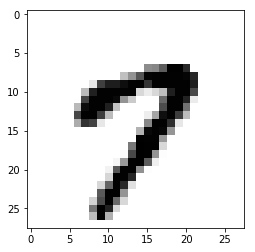

In [37]:
fig_digit(1)



Nous utilisons maintenant la fonction interact pour faire apparaître un widget permettant de faire varier notre image en fonction du paramètre alpha.

In [ ]:
ip.interact(fig_digit, alpha=(0.1, 100, 0.1))

### Question 5

Nous souhaitons maintenant réaliser un film représentant l'évolution de notre image en fonction de lavaleur $\alpha$.

In [21]:
from matplotlib import animation


### Question 6

La vaiable alpha permet de 

### Question 7

Nous voulons maintenant réaliser une ACP (analyse en composante principale)

In [22]:
from sklearn.decomposition import PCA, IncrementalPCA


In [23]:
n_components = 10
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

C:\Users\julien\Anaconda3\lib\site-packages\sklearn\decomposition\incremental_pca.py:294: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
C:\Users\julien\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


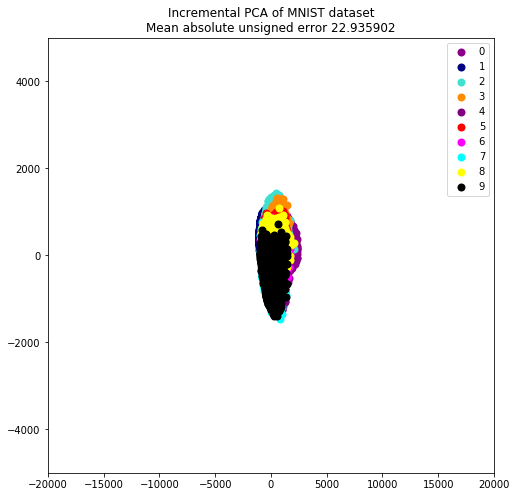

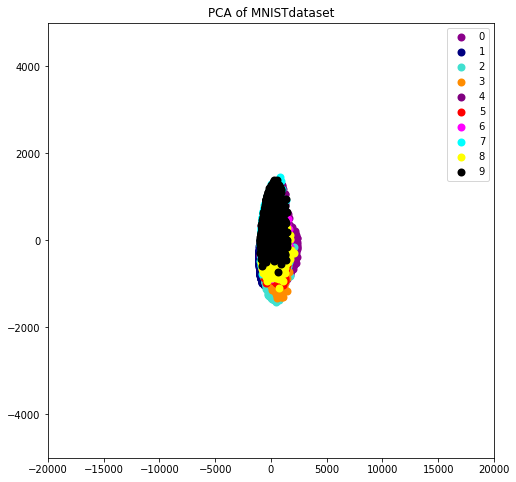

In [24]:
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
colors = ['darkmagenta','navy', 'turquoise', 'darkorange', 
          'purple', 'red', 'magenta', 'cyan', 'yellow', 'black',  ]
target_names=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], target_names):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                    color=color, lw=2, label=target_name)

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " de MNIST dataset\nMoyenne de l'erreur absolue "
                "%.6f" % err)
    else:
        plt.title(title + " de  MNIST dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-20015, 20015, -5000 , 5000])

plt.show()
